<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Example-of-per-step-cost" data-toc-modified-id="Example-of-per-step-cost-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Example of per-step cost</a></span></li><li><span><a href="#Cost-vs-qubits-size" data-toc-modified-id="Cost-vs-qubits-size-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Cost vs qubits size</a></span></li><li><span><a href="#Cost-with-respect-to-depth" data-toc-modified-id="Cost-with-respect-to-depth-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Cost with respect to depth</a></span></li></ul></li><li><span><a href="#Finding-biggest-tacklable-task" data-toc-modified-id="Finding-biggest-tacklable-task-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Finding biggest tacklable task</a></span><ul class="toc-item"><li><span><a href="#Full-ordering" data-toc-modified-id="Full-ordering-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Full ordering</a></span><ul class="toc-item"><li><span><a href="#Naive-(degree-based-local)-peo" data-toc-modified-id="Naive-(degree-based-local)-peo-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Naive (degree-based local) peo</a></span></li><li><span><a href="#QuickBB-peo" data-toc-modified-id="QuickBB-peo-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>QuickBB peo</a></span></li><li><span><a href="#Another-implementation-of-naive-peo" data-toc-modified-id="Another-implementation-of-naive-peo-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Another implementation of naive peo</a></span></li></ul></li></ul></li><li><span><a href="#Parallelize-after-critical-point" data-toc-modified-id="Parallelize-after-critical-point-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Parallelize after critical point</a></span><ul class="toc-item"><li><span><a href="#First-chopping" data-toc-modified-id="First-chopping-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>First chopping</a></span><ul class="toc-item"><li><span><a href="#Draw-chopped-graph" data-toc-modified-id="Draw-chopped-graph-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Draw chopped graph</a></span></li><li><span><a href="#Draw-chopped--parallelised-graph" data-toc-modified-id="Draw-chopped--parallelised-graph-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Draw chopped  parallelised graph</a></span></li><li><span><a href="#Late-paralelisaton-with-simple-reorder" data-toc-modified-id="Late-paralelisaton-with-simple-reorder-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Late paralelisaton with simple reorder</a></span><ul class="toc-item"><li><span><a href="#Full-chopped-cost" data-toc-modified-id="Full-chopped-cost-2.1.3.1"><span class="toc-item-num">2.1.3.1&nbsp;&nbsp;</span>Full chopped cost</a></span></li><li><span><a href="#Parallelised-chopped-cost" data-toc-modified-id="Parallelised-chopped-cost-2.1.3.2"><span class="toc-item-num">2.1.3.2&nbsp;&nbsp;</span>Parallelised chopped cost</a></span></li></ul></li><li><span><a href="#with-QuickBB-reorder" data-toc-modified-id="with-QuickBB-reorder-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>with QuickBB reorder</a></span><ul class="toc-item"><li><span><a href="#Full-chopped-cost" data-toc-modified-id="Full-chopped-cost-2.1.4.1"><span class="toc-item-num">2.1.4.1&nbsp;&nbsp;</span>Full chopped cost</a></span></li><li><span><a href="#Parallelized-chopped-cost" data-toc-modified-id="Parallelized-chopped-cost-2.1.4.2"><span class="toc-item-num">2.1.4.2&nbsp;&nbsp;</span>Parallelized chopped cost</a></span></li></ul></li></ul></li><li><span><a href="#Second-chopping" data-toc-modified-id="Second-chopping-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Second chopping</a></span><ul class="toc-item"><li><span><a href="#Draw-chopped--parallelised-graph" data-toc-modified-id="Draw-chopped--parallelised-graph-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Draw chopped  parallelised graph</a></span></li><li><span><a href="#with-naive-reorder" data-toc-modified-id="with-naive-reorder-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>with naive reorder</a></span></li><li><span><a href="#with-QuickBB-reorder" data-toc-modified-id="with-QuickBB-reorder-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>with QuickBB reorder</a></span></li></ul></li></ul></li><li><span><a href="#Trying-different-naive-orderings" data-toc-modified-id="Trying-different-naive-orderings-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Trying different naive orderings</a></span></li><li><span><a href="#Analyse-chopping" data-toc-modified-id="Analyse-chopping-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analyse chopping</a></span></li><li><span><a href="#Profiling-actual-simulation" data-toc-modified-id="Profiling-actual-simulation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Profiling actual simulation</a></span></li></ul></div>

In [269]:
import numpy as np
import networkx as nx
from loguru import logger as log
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import copy
import sys
sys.path.append('..')
sns.set_style('whitegrid')
import qtree 
import utils
import utils_qaoa as qaoa

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [270]:
def get_test_graph(S):
    #G = nx.triangular_lattice_graph(S, S)
    G = nx.grid_2d_graph(S+1, (2+S)//2)
    # remove grid labelling
    gen = (x for x in range(G.number_of_nodes()))
    G = nx.relabel_nodes(G, lambda x: next(gen))
    return G

def get_test_qaoa(S, p):
    G = get_test_graph(S)
    N = G.number_of_nodes()
    beta, gamma = [np.pi/3]*p, [np.pi/2]*p
    qc = qaoa.get_qaoa_circuit(G, beta, gamma)
    return qc, N

def get_test_expr_graph(S, p):
    qc, N = get_test_qaoa(S, p)
    graph = qtree.graph_model.circ2graph(N, qc)
    return graph, N

def get_optimized_expr(S, p):
    graph, N = get_test_expr_graph(S, p)
    graph_opt, nghs = _optimise_graph(graph)
    return graph_opt, nghs, N

def _optimise_graph(graph):
    peo, nghs = utils.get_locale_peo(graph, utils.n_neighbors)
    graph_opt, slice_dict = utils.reorder_graph(graph, peo)
    return graph_opt, nghs

def get_splitted_graph(S, p, pars):
    graph, N = get_test_expr_graph(S, p)
    idxs, graph = qtree.graph_model.split_graph_by_metric(graph, n_var_parallel=pars)
    graph_opt, nghs = _optimise_graph(graph)
    return graph, nghs, N

def get_cost_of_splitted(S, p, pars):
    graph, nghs, N = get_splitted_graph(S, p, pars)
    graph_opt, nghs = _optimise_graph(graph)
    mems, flops = qtree.graph_model.cost_estimator(graph_opt)
    return mems,flops,nghs, N

def get_cost_of_task(S, p=1):
    graph_opt, nghs, N = get_optimized_expr(S, p)
    mems, flops = qtree.graph_model.cost_estimator(graph_opt)
    return mems,flops,nghs, N

## Example of per-step cost

In [271]:
mems, flops, nghs, N = get_cost_of_task(15)
utils.plot_cost(mems, flops)

2020-03-10 19:16:13,391- INFO•	Generated graph with 976 nodes and 2136 edges


KeyboardInterrupt: 

In [ ]:
def neigh_plot(nghs):
    plt.plot(nghs)
    nghs = np.array(nghs)
    dn = nghs[1:] - nghs[:-1]
    plt.plot(dn)
    
def get_chop_dn_drop(nghs):
    nghs = np.array(nghs)
    dn = nghs[1:] - nghs[:-1]
    neg_idx = [i for i, n in enumerate(dn) if n<0]
    pos_idx = [i for i, n in enumerate(dn) if n>0]
    drop_idx = neg_idx[0]
    pos_idx.reverse()
    before_drop = [i for i in pos_idx if i<drop_idx]
    return before_drop[0] - 1

    
neigh_plot(nghs)
get_chop_dn_drop(nghs)

## Cost vs qubits size 

In [ ]:
def log_log_scale():
    plt.yscale('log')
    plt.xscale('log')
    
def minorticks():
    plt.minorticks_on()
    plt.grid(which='minor', alpha=0.5, linestyle='-', axis='both')
    
def get_est(xs, vals):
    mem_est = np.polyfit(np.log(xs), np.log(vals), 2)
    mem_est = np.poly1d(mem_est)
    est = np.linspace(20,1e2, 100)
    est = np.log(est)
    mem_est = mem_est(est)
    return np.exp(est),  np.exp(mem_est)

In [ ]:
sizes = np.arange(5,17,1)
results = [
   get_cost_of_task(s, 3) for s in sizes
]
def plot_theory(results):
    sums = [[sum(x) for x in y[:3]] for y in results]
    memsums, flopsums, nghssums = zip(*sums)
    ns = list(zip(*results))[3]

    est, mem_est = get_est(ns, memsums)
    est, flop_est = get_est(ns, flopsums)


    plt.plot(ns, memsums, label='mem sum')
    plt.plot(ns, flopsums, label='flop sum')
    plt.plot(est, mem_est, '--', label='mem log-log fit')
    plt.plot(est, flop_est, '--', label='flop log-log fit')

    plt.xlabel('Number of qbits')
    plt.yscale('log')
    plt.xscale('log')
    plt.suptitle('QAOA one amplitude simulation cost', fontsize=14)
    plt.title('MaxCut triangular grids')
    plt.legend()
    plt.minorticks_on()
    plt.grid(which='minor', alpha=0.5, linestyle='-', axis='both')

In [ ]:
plot_theory(results)


## Cost with respect to depth


In [ ]:
psize = 4
Ssize = 9

costs_with_p = []
for p in range(1, 1+psize):
    for S in range(2, 2+Ssize):
        costs = get_cost_of_task(S, p)
        costs_with_p.append(costs)

In [ ]:

costs_with_p_p= [(sum(x[0]), sum(x[1]), max(x[2]), x[3]) for x in costs_with_p]
data = np.array(list(zip(*costs_with_p_p)))

data = data.reshape(4, psize, Ssize)
print(data.shape)

fig, axs = plt.subplots(1,3, figsize=(15, 5))

plt.sca(axs[0])
log_log_scale()
minorticks()
plt.title('memory')
for i in range(psize):
    plt.plot(data[-1,i], data[0,i])
    
plt.sca(axs[1])
log_log_scale()
minorticks()
plt.title('Flop')
for i in range(psize):
    plt.plot(data[-1,i], data[1,i])
    
plt.sca(axs[2])
log_log_scale()
minorticks()
plt.title('Neigh')
for i in range(psize):
    plt.plot(data[-1,i], data[2,i])

plt.suptitle('Cost dependence for different p')
plt.savefig('figures/cost_vs_p.png')

In [ ]:
psize = 3
Ssize = 3
p = 1

costs_with_pars = []
for pars in range(1, 1+psize):
    for S in range(25, 25+Ssize):
        costs = get_cost_of_splitted(S, p, pars)
        costs_with_pars.append(costs)

In [ ]:


costs_with_p_ = [(sum(x[0]), sum(x[1]), max(x[2]), x[3]) for x in costs_with_pars]
data = np.array(list(zip(*costs_with_p_)))

data = data.reshape(4, psize, Ssize)
print(data.shape)

fig, axs = plt.subplots(1,3, figsize=(15, 5))
colormap = plt.cm.gist_ncar
labels = [f'nodes: 2^{i}' for i in range(1, 1+psize)]
for ax in axs:
    ax.set_prop_cycle(plt.cycler('color', plt.cm.cool(np.linspace(0, 1, psize))))
    ax.set_xlabel('Qubit count')

plt.sca(axs[0])
log_log_scale()
minorticks()
plt.title('memory')
for i in range(psize):
    plt.plot(data[-1,i], data[0,i])
    
plt.sca(axs[1])
log_log_scale()
minorticks()
plt.title('Flop')
for i in range(psize):
    plt.plot(data[-1,i], data[1,i])
    
plt.sca(axs[2])
log_log_scale()
minorticks()
plt.title('Neigh')
for i in range(psize):
    plt.plot(data[-1,i], data[2,i])
plt.legend(labels)

plt.suptitle('Cost dependence for parallelised, rectangular task. p=1')
plt.savefig('figures/rect_cost_vs_nodes_p1.png')

In [ ]:

costs_with_p_ = [(sum(x[0]), sum(x[1]), max(x[2]), x[3]) for x in costs_with_pars]
data = np.array(list(zip(*costs_with_p_)))

data = data.reshape(4, psize, Ssize)
data = data.transpose(0,2,1)
print(data.shape)
processes = 2**(np.arange(1, 1+psize))
fig, axs = plt.subplots(1,3, figsize=(15, 5))
for ax in axs:
    ax.set_xlabel('Nodes')
    ax.set_prop_cycle(plt.cycler('color', plt.cm.spring(np.linspace(0, 1, psize))))

plt.sca(axs[0])
log_log_scale()
minorticks()
plt.title('memory')
for i in range(Ssize):
    plt.plot(processes, data[0,i])
    
plt.sca(axs[1])
log_log_scale()
minorticks()
plt.title('Flop')
for i in range(Ssize):
    plt.plot(processes, data[1,i])
    
plt.sca(axs[2])
log_log_scale()
minorticks()
plt.title('Neigh')
for i in range(Ssize):
    plt.plot(processes, data[2,i])

labels = [f'{int(i)} qubits' for i in data[-1,:, 0]]
plt.legend(labels)
plt.suptitle('Cost dependence for parallelised vars, different qubit counts, rectangular task. p=1')
plt.savefig('figures/rect_cost_vs_nodes_T_p1.png')
jjj

# Finding biggest tacklable task
## Full ordering

In [ ]:
graph, N = get_test_expr_graph(13, 1)

print(N)

### Naive (degree-based local) peo

In [ ]:
%%time
peo, nghs = utils.get_locale_peo(graph, utils.n_neighbors)
graph_relabel, slice_dict = utils.reorder_graph(graph, peo)

costs, flops = qtree.graph_model.cost_estimator(graph_relabel)
print(max(costs)/1e9)
print(max(flops)/1e9)
utils.plot_cost(costs, flops)

#nx.draw_kamada_kawai(graph, node_size=3)

In [ ]:
neigh_plot(nghs)

### QuickBB peo

QuickBB usually fails on big (>5k nodes) graphs

In [ ]:
%cd ..

In [ ]:
%%time
peoqbb, tw = qtree.graph_model.get_peo(graph)

In [ ]:
graph, slice_dict = utils.reorder_graph(graph, peoqbb)

costs, mems = qtree.graph_model.cost_estimator(graph)
print(max(mems)/1e8)
print(max(costs)/1e8)
utils.plot_cost(costs, mems)

### Another implementation of naive peo

In [ ]:
%%time
peon, nghs = utils.get_neighbours_peo(graph)
graph_relabel, slice_dict = utils.reorder_graph(graph, peon)

costs, mems = qtree.graph_model.cost_estimator(graph_relabel)
print(max(mems)/1e8)
print(max(costs)/1e8)
utils.plot_cost(costs, mems)

In [ ]:
peo, nghs = utils.get_locale_peo(graph, utils.edges_to_clique)
graph_relabel, slice_dict = utils.reorder_graph(graph, peo)

costs, mems = qtree.graph_model.cost_estimator(graph_relabel)
utils.plot_cost(costs, mems)

# Parallelize after critical point

## First chopping 

In [ ]:
chop1 = 697

In [ ]:
for n in peo[:chop1]:
    qtree.graph_model.eliminate_node(graph, n)
print('Nodes left:', graph.number_of_nodes())

### Draw chopped graph

In [ ]:
print(peo[4100:])
print(sorted(graph.degree, key=lambda x: x[1]))
print(sorted([ utils.edges_to_clique(graph, x[0]) for x in graph.degree]))

In [ ]:
nx.draw_kamada_kawai(graph, node_size=16)

### Draw chopped  parallelised graph

In [ ]:
PAR_VARS = 6
par_vars, graph_split = qtree.graph_model.split_graph_by_metric(
    graph
    , n_var_parallel=PAR_VARS
)
nx.draw_kamada_kawai(graph_split, node_size=16)

### Late paralelisaton with simple reorder

#### Full chopped cost

In [ ]:
graph_opt, nghs = _optimise_graph(graph)
mems, flops = qtree.graph_model.cost_estimator(graph_opt)
print(max(mems)/1e9)
print(max(flops)/1e9)
utils.plot_cost(mems, flops)

#### Parallelised chopped cost

In [ ]:
graph_split_opt, nghs = _optimise_graph(graph_split)
mems, flops = qtree.graph_model.cost_estimator(graph_split_opt)
print(max(mems)/1e9)
print(max(flops)/1e9)
utils.plot_cost(mems, flops)

### with QuickBB reorder

#### Full chopped cost

In [ ]:
peoqbb, tw = qtree.graph_model.get_peo(graph)
graph_opt_relabel, nghs = utils.reorder_graph(graph, peoqbb)
mems, flops = qtree.graph_model.cost_estimator(graph_opt_relabel)

In [ ]:
print(max(mems)/1e9)
print(max(flops)/1e9)
utils.plot_cost(mems, flops)

#### Parallelized chopped cost

In [ ]:
peoqbb_split, tw = qtree.graph_model.get_peo(graph_split)

In [ ]:
graph_split_relabel, nghs = utils.reorder_graph(graph_split, peoqbb_split)
mems, flops = qtree.graph_model.cost_estimator(graph_split_relabel)
print(max(mems)/1e9)
print(max(flops)/1e9)
utils.plot_cost(mems, flops)

In [ ]:
peoqbb_split, tw = qtree.graph_model.get_peo(graph_split)

## Second chopping

In [ ]:
chop2 = 900

In [ ]:
for n in peo[chop1:chop1 + chop2]:
    qtree.graph_model.eliminate_node(graph, n)
print('Nodes left:', graph.number_of_nodes())

In [ ]:
print(peo[chop1 + chop2:])
print(sorted(graph.degree, key=lambda x: x[1]))
print(sorted([ utils.edges_to_clique(graph, x[0]) for x in graph.degree]))

In [ ]:
nx.draw_kamada_kawai(graph, node_size=16)

### Draw chopped  parallelised graph

In [ ]:
par_vars, graph_split = qtree.graph_model.split_graph_by_metric(graph, n_var_parallel=12)
nx.draw_kamada_kawai(graph_split, node_size=16)

### with naive reorder

In [ ]:
graph_opt, nghs = _optimise_graph(graph)
mems, flops = qtree.graph_model.cost_estimator(graph_opt)
print(max(mems)/1e9)
print(max(flops)/1e9)
utils.plot_cost(mems, flops)

In [ ]:
graph_split_opt, nghs = _optimise_graph(graph_split)
mems, flops = qtree.graph_model.cost_estimator(graph_split_opt)
print(max(mems)/1e9)
print(max(flops)/1e9)
utils.plot_cost(mems, flops)

### with QuickBB reorder

In [ ]:
peoqbb, tw = qtree.graph_model.get_peo(graph)
graph_opt_relabel, nghs = utils.reorder_graph(graph, peoqbb)
mems, flops = qtree.graph_model.cost_estimator(graph_opt_relabel)
print(max(mems)/1e9)
print(max(flops)/1e9)
utils.plot_cost(mems, flops)

In [ ]:
peoqbb_split, tw = qtree.graph_model.get_peo(graph_split)

In [ ]:
graph_split_relabel, nghs = utils.reorder_graph(graph_split, peoqbb_split)
mems, flops = qtree.graph_model.cost_estimator(graph_split_relabel)
print(max(mems)/1e9)
print(max(flops)/1e9)
utils.plot_cost(mems, flops)

In [ ]:
sg = graph.subgraph([1538] + list(graph.neighbors(1538)))
N = sg.number_of_nodes()
print(sg.number_of_edges(), 1/2*N*(N-1))
print(list(sg.selfloop_edges()))
edges = [e for e in graph.edges if all([e[-1]==0]+[x in sg.nodes for x in e[:2]])]
print(len(edges))
print(utils.edges_to_clique(graph, 1538))

nx.draw_shell(sg, with_labels=True)

# Trying different naive orderings 

In [ ]:
def cost_graph_peo(graph_old, peo):
    graph, _ = utils.reorder_graph(graph_old, peo)
    costs  = qtree.graph_model.cost_estimator(graph)
    return costs

In [ ]:
sizes = np.arange(21,32, 2)
exprs = [get_test_expr_graph(s, 1) for s in sizes]
qbit_cnts = [N for _, N in exprs]
exprs = [graph for graph, _ in exprs]

print('Qbit counts:', qbit_cnts)

peos_maxs = {
    'degree naive':[
        utils.get_locale_peo(graph, utils.n_neighbors) for graph in exprs
    ]
    ,'min-fill naive':[
        qtree.graph_model.get_upper_bound_peo_ints(graph) for graph in exprs
    ]
}

In [ ]:
peos = {k: [peo for peo, max in v] for k, v in peos_maxs.items()}
costs= {
    k:[cost_graph_peo(graph, peo) for graph, peo in zip(exprs, v)]
    for k, v in peos.items()
}

In [ ]:
mems = { k:[sum(mems) for mems, _ in v] 
        for k, v in costs.items() }
mems_max = { k:[np.max(mems) for mems, _ in v] 
        for k, v in costs.items() }

flops = { k:[sum(flops) for _, flops in v] 
        for k, v in costs.items() }
flops_max = { k:[max(flops) for _, flops in v] 
        for k, v in costs.items() }

for k in mems:
    plt.plot(qbit_cnts, mems[k], label=k)
    plt.plot(qbit_cnts, mems_max[k], '--', label=k+'max')

plt.yscale('log')
plt.xlabel('qbit count')
plt.title('Compare naive ordering methods')

plt.legend()
plt.savefig('degree_vs_minfill.pdf')

In [ ]:
import json
with open('costs_cache.json', 'w+') as f:
    json.dump(mems, f)

# Analyse chopping


In [ ]:
def get_chop_idxs(graph, peo, cost, nghs):
    points = 4
    drop_idx = get_chop_dn_drop(nghs)
    min_idx = np.argmin(cost[0][:drop_idx])
    before_min = min_idx - (drop_idx-min_idx)
    on_plato = 2 * min_idx // 3
        
    return on_plato, before_min, min_idx, drop_idx, drop_idx+5

def _cost_before_chop(idxs, cost):
    mems, floats = cost
    before_mem = [max(mems[:i]) for i in idxs]
    return before_mem


In [ ]:
def contract_by_peo(old_graph, peo):
    graph = copy.deepcopy(old_graph)
    for n in peo:
        qtree.graph_model.eliminate_node(graph, n)
    return graph

In [ ]:
sizes = [18, 22, 25, 28]

tasks = [get_test_expr_graph(s, 1) for s in sizes]
graphs =     [g for g, _ in tasks]
qbit_sizes = [N for _, N in tasks]
peos_n = [utils.get_locale_peo(g, utils.n_neighbors) for g in graphs]
peos, nghs = zip(*peos_n)

In [ ]:

costs = [cost_graph_peo(g, p) for g, p in zip(graphs, peos)]


In [ ]:
tqdm._instances.clear()
chopped_g = [
    contract_by_peo(g, peo[:_idx]) 
    for g, peo, cost, ng in tqdm( zip(graphs, peos, costs, nghs) )
    for _idx in get_chop_idxs(g, peo, cost, ng)
]

costs_before_chop = [
    mem
    for g, peo, cost, ng in tqdm( zip(graphs, peos, costs, nghs) )
    for mem in _cost_before_chop(get_chop_idxs(g, peo, cost, ng), cost)
]

In [ ]:
print('contracted graphs', [g.number_of_nodes() for g in chopped_g])

print('costs before chop', costs_before_chop)

In [ ]:
par_vars = [0,1,2,3,7,11]

parallelized_g = [
    g
    for graph in chopped_g
    for parvar in par_vars
    for  _, g in [qtree.graph_model.split_graph_by_metric(graph, n_var_parallel=parvar)]
]

In [ ]:
print('parallelised graphs', [g.number_of_nodes() for g in parallelized_g])

In [ ]:
peos_par = [
    peo 
    for g in tqdm( parallelized_g )
    for peo, _ in [utils.get_locale_peo(g, utils.n_neighbors)]
]


In [277]:
def get_qbb_peo(graph):
    try:
        peo, tw = qtree.graph_model.get_peo(graph)
    except:
        print('QBB fail, nodes count:', graph.number_of_nodes())
        peo, nghs = utils.get_locale_peo(graph, utils.n_neighbors)
    return peo

In [278]:
peos_par = [ get_qbb_peo(g) for g in tqdm( parallelized_g ) ]



  0%|          | 0/120 [00:00<?, ?it/s]2020-03-10 19:20:45,019- INFO•	generating config file output/quickbb.35139332.cnf
2020-03-10 19:20:45,023- INFO•	excecuting quickbb: ./quickbb/quickbb_64  --min-fill-ordering --time 60 --cnffile output/quickbb.35139332.cnf 


  1%|          | 1/120 [01:02<2:04:33, 62.80s/it]2020-03-10 19:21:47,762- INFO•	generating config file output/quickbb.87115871.cnf
2020-03-10 19:21:47,765- INFO•	excecuting quickbb: ./quickbb/quickbb_64  --min-fill-ordering --time 60 --cnffile output/quickbb.87115871.cnf 


  2%|▏         | 2/120 [02:05<2:03:20, 62.71s/it]2020-03-10 19:22:50,406- INFO•	generating config file output/quickbb.48418583.cnf
2020-03-10 19:22:50,409- INFO•	excecuting quickbb: ./quickbb/quickbb_64  --min-fill-ordering --time 60 --cnffile output/quickbb.48418583.cnf 


  2%|▎         | 3/120 [03:07<2:01:50, 62.48s/it]2020-03-10 19:23:52,144- INFO•	generating config file output/quickbb.98947196.cnf
2020-03-10 19:23:52,147- INFO•	excecuting quickbb: .

 24%|██▍       | 29/120 [29:18<1:30:59, 59.99s/it]2020-03-10 19:50:03,104- INFO•	generating config file output/quickbb.21761047.cnf
2020-03-10 19:50:03,107- INFO•	excecuting quickbb: ./quickbb/quickbb_64  --min-fill-ordering --time 60 --cnffile output/quickbb.21761047.cnf 


 25%|██▌       | 30/120 [30:18<1:29:59, 60.00s/it]2020-03-10 19:51:03,205- INFO•	generating config file output/quickbb.14285124.cnf
2020-03-10 19:51:03,211- INFO•	excecuting quickbb: ./quickbb/quickbb_64  --min-fill-ordering --time 60 --cnffile output/quickbb.14285124.cnf 


 26%|██▌       | 31/120 [31:35<1:36:35, 65.11s/it]2020-03-10 19:52:20,489- INFO•	generating config file output/quickbb.00034855.cnf
2020-03-10 19:52:20,497- INFO•	excecuting quickbb: ./quickbb/quickbb_64  --min-fill-ordering --time 60 --cnffile output/quickbb.00034855.cnf 


 27%|██▋       | 32/120 [32:42<1:36:35, 65.86s/it]2020-03-10 19:53:27,910- INFO•	generating config file output/quickbb.90977658.cnf
2020-03-10 19:53:27,915- INFO•	excecutin

 48%|████▊     | 58/120 [59:52<1:02:09, 60.15s/it]2020-03-10 20:20:37,395- INFO•	generating config file output/quickbb.27912560.cnf
2020-03-10 20:20:37,401- INFO•	excecuting quickbb: ./quickbb/quickbb_64  --min-fill-ordering --time 60 --cnffile output/quickbb.27912560.cnf 


 49%|████▉     | 59/120 [1:00:52<1:01:05, 60.10s/it]2020-03-10 20:21:37,358- INFO•	generating config file output/quickbb.97670172.cnf
2020-03-10 20:21:37,361- INFO•	excecuting quickbb: ./quickbb/quickbb_64  --min-fill-ordering --time 60 --cnffile output/quickbb.97670172.cnf 


 50%|█████     | 60/120 [1:01:52<1:00:09, 60.15s/it]2020-03-10 20:22:37,971- INFO•	generating config file output/quickbb.00992518.cnf
2020-03-10 20:22:37,986- INFO•	excecuting quickbb: ./quickbb/quickbb_64  --min-fill-ordering --time 60 --cnffile output/quickbb.00992518.cnf 


 51%|█████     | 61/120 [1:03:07<1:03:24, 64.48s/it]2020-03-10 20:23:52,383- INFO•	generating config file output/quickbb.53671097.cnf
2020-03-10 20:23:52,389- INFO•	exc



 72%|███████▎  | 87/120 [1:31:43<33:21, 60.65s/it]2020-03-10 20:52:28,663- INFO•	generating config file output/quickbb.46896714.cnf
2020-03-10 20:52:28,666- INFO•	excecuting quickbb: ./quickbb/quickbb_64  --min-fill-ordering --time 60 --cnffile output/quickbb.46896714.cnf 


 73%|███████▎  | 88/120 [1:32:43<32:15, 60.49s/it]2020-03-10 20:53:28,755- INFO•	generating config file output/quickbb.54391014.cnf
2020-03-10 20:53:28,757- INFO•	excecuting quickbb: ./quickbb/quickbb_64  --min-fill-ordering --time 60 --cnffile output/quickbb.54391014.cnf 


 74%|███████▍  | 89/120 [1:33:45<31:21, 60.70s/it]2020-03-10 20:54:30,108- INFO•	generating config file output/quickbb.48518321.cnf
2020-03-10 20:54:30,166- INFO•	excecuting quickbb: ./quickbb/quickbb_64  --min-fill-ordering --time 60 --cnffile output/quickbb.48518321.cnf 


 75%|███████▌  | 90/120 [1:34:45<30:21, 60.72s/it]2020-03-10 20:55:30,869- INFO•	generating config file output/quickbb.64482983.cnf
2020-03-10 20:55:30,880- INFO•	excecut



 97%|█████████▋| 116/120 [2:07:11<04:09, 62.37s/it]2020-03-10 21:27:56,061- INFO•	generating config file output/quickbb.24556184.cnf
2020-03-10 21:27:56,066- INFO•	excecuting quickbb: ./quickbb/quickbb_64  --min-fill-ordering --time 60 --cnffile output/quickbb.24556184.cnf 


 98%|█████████▊| 117/120 [2:08:12<03:06, 62.18s/it]2020-03-10 21:28:57,721- INFO•	generating config file output/quickbb.98347897.cnf
2020-03-10 21:28:57,725- INFO•	excecuting quickbb: ./quickbb/quickbb_64  --min-fill-ordering --time 60 --cnffile output/quickbb.98347897.cnf 


 98%|█████████▊| 118/120 [2:09:13<02:03, 61.88s/it]2020-03-10 21:29:58,884- INFO•	generating config file output/quickbb.84430191.cnf
2020-03-10 21:29:58,887- INFO•	excecuting quickbb: ./quickbb/quickbb_64  --min-fill-ordering --time 60 --cnffile output/quickbb.84430191.cnf 


 99%|█████████▉| 119/120 [2:10:14<01:01, 61.54s/it]2020-03-10 21:30:59,636- INFO•	generating config file output/quickbb.26334088.cnf
2020-03-10 21:30:59,639- INFO•	exc

In [280]:
tqdm._instances.clear()


In [281]:
costs_all = [cost_graph_peo(g, p) for g, p in 
           tqdm(
               list(
                   zip(
                       parallelized_g, peos_par
                   )
               )
           )]

100%|██████████| 120/120 [10:21<00:00,  5.18s/it]


In [282]:
mems = [max(m) for m,_ in costs_all ]

In [283]:
_data = np.array(mems).reshape(len(sizes), 5, len(par_vars)) 

_data

array([[[   501816,    235560,    471074,    130282,    136242,
             68164],
        [   490318,    507970,    176254,     78798,    235552,
             66616],
        [   287854,    471074,    268656,    267830,    289700,
            135506],
        [   501816,    951370,    951370,    942154,    247860,
             36888],
        [   502620,    920612,    483362,    483362,    239622,
            123952]],

       [[  4121682,   7389224,   2146984,   3918956,   1025082,
            538682],
        [  3866664,   3765330,   1862732,   7506010,   1970238,
           3694632],
        [  3900686,  30244948,   3857514,   3765348,   2025596,
           7757880],
        [  4164684,   3869770,   3866680,   3869770,    923684,
            283246],
        [  4164684,   3869770,   3878964,   3866680,   3866680,
            982130]],

       [[  7856204,  15036536,   7579722,  14818400,   3719206,
           3713090],
        [ 14713924,   7576698,  14833740,  29556782,   780704

In [284]:
def trid_plot(x, y, labels, dimspec=(0,1,2)): 
    y = y.transpose(dimspec)
    plot_cnt = y.shape[0]
    line_cnt = y.shape[1]
    def _label_of(dim, idx):
        return labels[dim] + ' ' + str(x[dim][idx])
    
    fig, axs = plt.subplots(1, plot_cnt, sharey=True, figsize=(15,4))
    try:
        iter(axs)
    except TypeError:
        axs = [axs]
    for i, ax in enumerate(axs):
        plt.sca(ax)
        plt.title(_label_of(0, i))
        for j in range(line_cnt):
            plt.plot(x[2], y[i,j], label=_label_of(1, j))
            plt.xlabel(labels[2])
            plt.yscale('log')
            plt.legend()
    

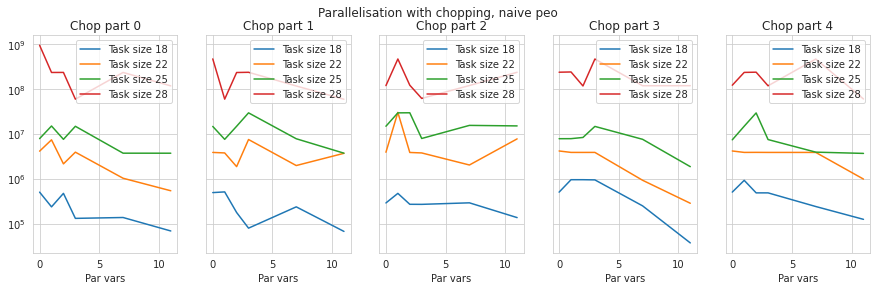

In [285]:
xs = [np.arange(5), sizes, par_vars]
trid_plot(xs, _data, ['Chop part', 'Task size', 'Par vars'],(1,0,2))
plt.suptitle('Parallelisation with chopping, naive peo')
plt.savefig('chop_analys_naivepeo.pdf')

In [ ]:
_chopcost = np.array(costs_before_chop).reshape(len(sizes), 5, 1)
trid_plot([' ', sizes, range(5)], _chopcost, ['Chop cost', 'Task size', 'Chop part'], (2,0,1))

In [ ]:
utils.plot_cost(*costs[-1])

In [ ]:
_cost_before_chop([600, 800, 905, 950],  costs[-1])


# Profiling actual simulation


In [ ]:
from pyrofiler import mem_util, timed, timing
from pyrofiler.callbacks import append_to

In [ ]:
profile = {}

@mem_util(description='mem', callback=append_to(profile))
@timed('time', callback=append_to(profile))
@log.catch()
def simulate_circ(circuit, n_qubits):
    buckets, data_dict, bra_vars, ket_vars = qtree.optimizer.circ2buckets(
        n_qubits, circuit)

    graph = qtree.graph_model.buckets2graph(
        buckets,
        ignore_variables=bra_vars+ket_vars)

    peo, nghs = utils.get_locale_peo(graph, utils.n_neighbors)
    peo = qtree.graph_model.indices_to_vars(peo, graph)
    
    # place bra and ket variables to beginning, so these variables
    # will be contracted first
    #peo, treewidth = qtree.graph_model.get_peo(graph)

    peo = ket_vars + bra_vars + peo
    perm_buckets, perm_dict = qtree.optimizer.reorder_buckets(buckets, peo)

    # extract bra and ket variables from variable list and sort according
    # to qubit order
    ket_vars = sorted([perm_dict[idx] for idx in ket_vars], key=str)
    bra_vars = sorted([perm_dict[idx] for idx in bra_vars], key=str)

    # Take the subtensor corresponding to the initial state
    initial_state = target_state = 0
    slice_dict = qtree.utils.slice_from_bits(initial_state, ket_vars)
    slice_dict.update(
        qtree.utils.slice_from_bits(target_state, bra_vars)
    )
    sliced_buckets = qtree.np_framework.get_sliced_np_buckets(
        perm_buckets, data_dict, slice_dict)
    
    with timing('time_raw', callback=append_to(profile)):
        result = qtree.optimizer.bucket_elimination(
            sliced_buckets, qtree.np_framework.process_bucket_np)
        

In [ ]:
for key in profile:
    profile[key] = []
    
profile['N'] = []
sizes = np.arange(5,27) 

for S in sizes[:]:
    qc, N = get_test_qaoa(S)
    profile['N'].append(N)
    print(N,'qubits')
    result = simulate_circ(qc, N)

In [ ]:
ns = profile['N']

def to_flop(secs):
    secs = np.array(secs)
    secs *= .3*1e12
    return secs
def to_nums(mems):
    mems = np.array(mems)
    mems = mems/16
    return mems

mems = to_nums(profile['mem'])
#mems -= np.min(mems)


plt.plot(ns, to_flop(profile['time_raw']), label='time raw')
plt.plot(ns, to_flop(profile['time']), label='time')
plt.plot(ns, mems, label='mem')
plt.legend()
plt.yscale('log')
plt.xscale('log')

In [ ]:
# Sizes for theory
sizes = np.arange(3,21)

In [ ]:
results = [
   get_cost_of_task(s) for s in sizes
]
sums = [[sum(x) for x in y[:3]] for y in results]
memsums, flopsums, nghssums = zip(*sums)
ns_theory = list(zip(*results))[3]

In [ ]:
est, mem_est = get_est(ns_theory, memsums)
est, flop_est = get_est(ns_theory, flopsums)

fig, axs = plt.subplots(1,2, figsize=(12,5))

plt.sca(axs[0])
log_log_scale()
minorticks()
plt.plot(ns_theory, memsums, label='theory')
plt.plot(ns, mems, label='experiment')
plt.plot(est, mem_est, '--', label='log-log fit')
plt.legend()
plt.title('Memory')
plt.xlabel('Number of qbits')

plt.sca(axs[1])
log_log_scale()
minorticks()
plt.plot(ns_theory, flopsums, label='theory')
plt.plot(ns, to_flop(profile['time']), label='experiment')
plt.plot(ns, to_flop(profile['time_raw']), label='experiment raw')
plt.plot(est, flop_est, '--', label='log-log fit')

plt.xlabel('Number of qbits')

plt.suptitle('QAOA one amplitude simulation cost', fontsize=14)
plt.title('FLOP')
plt.legend()


In [ ]:
filename = 'qaoa_cost_theory_exp'
plt.savefig(f'qaoa/figures/{filename}.png')
plt.savefig(f'qaoa/figures/{filename}.pdf')